In [22]:
import cv2
from skimage.filters import apply_hysteresis_threshold
from skimage.filters import frangi, hessian,prewitt, roberts, sobel, prewitt_h, prewitt_v
from skimage.filters import gabor, gaussian, laplace, median, meijering
from skimage.filters import rank_order,threshold_local,threshold_niblack
from skimage.filters import threshold_otsu,threshold_sauvola,threshold_triangle
from skimage.filters import threshold_yen, unsharp_mask, wiener
from skimage.restoration import denoise_nl_means, denoise_bilateral,unsupervised_wiener, unwrap_phase
from skimage.restoration import denoise_tv_bregman, denoise_tv_chambolle, denoise_wavelet
from skimage.restoration import estimate_sigma, richardson_lucy
from skimage import filters
from skimage.metrics import adapted_rand_error, contingency_table, mean_squared_error, peak_signal_noise_ratio
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import disk
from skimage import exposure

In [2]:
#el método --frangi-- detecta los bordes continuos de una imagen
#el método --gaussian-- el eficiente pero difumina la imagen, si podemos resaltar los bordes??
#el método --median-- deja moteada la imagen
#el mpetodo --meijering-- detecta los bordes, análogo al --frangi--
#el mpetodo --sato-- detecta los bordes, análogo al --frangi--
#el método --threshold_isodata-- crea una imagen binaria
#el método --unsharp_mask-- resalta los pixeles

In [3]:
imagen = cv2.imread("42original.png", cv2.IMREAD_GRAYSCALE)
kernel=9

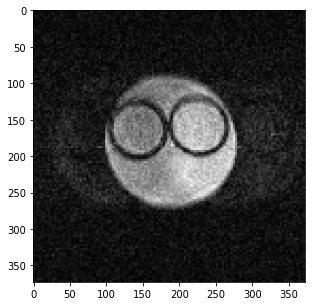

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(imagen,cmap='gray')
plt.show()

In [5]:
def chain_1(image, sigma=2):
    """
    esta función toma una imagen en escala de grises y le aplica el filtro gaussiano, el mediano, unsharp 
    para resaltar bordes y un NLM
    """
    A = gaussian(image, sigma)
    B = median(A, disk(3))
    C = np.around(unsharp_mask(B, radius=5, amount=7),2)
    D = denoise_nl_means(C,patch_size=15, patch_distance=20, h=0.19,preserve_range=False)
    E = denoise_nl_means(D,patch_size=15, patch_distance=20, h=0.19,preserve_range=False)
    
    return E

In [6]:
def chain_2(image, sigma=2):
    """
    función que aplica el filtro bilateral, NLM, unsharp y otra iteración del NLM
    """
    A = cv2.bilateralFilter(image,5,50,50)
    B = denoise_nl_means(A,patch_size=10, patch_distance=10, h=0.1,preserve_range=False)
    C = np.around(unsharp_mask(B, radius=10, amount=10),2)
    D = denoise_nl_means(C,patch_size=15, patch_distance=20, h=0.19)
    E = median(D)
    
    return E

In [7]:
def chain_3(image, sigma=2):
    
    A = denoise_tv_bregman(image, weight=15, max_iter=1, eps=0.001, isotropic=True)
    B = denoise_nl_means(A,patch_size=25, patch_distance=25, h=0.1,preserve_range=False)
    C = denoise_nl_means(B,patch_size=3, patch_distance=3, h=0.09,preserve_range=False)
    D = np.around(unsharp_mask(C, radius=4, amount=4),2)
    
    return D

In [8]:
def chain_4(image, sigma=2):
    
    A = denoise_tv_chambolle(imagen, weight=0.09)
    B = gaussian(A, sigma=0.8)
    C = denoise_nl_means(B,patch_size=5, patch_distance=5, h=0.1,preserve_range=False)
    D = denoise_nl_means(C,patch_size=7, patch_distance=7, h=0.1,preserve_range=False)
    E = np.around(unsharp_mask(D, radius=7, amount=7),2)

    return E

In [9]:
#para estimar el sigma de una imagen
sigma_hat = estimate_sigma(imagen, multichannel=False)

In [10]:
# plt.figure(figsize=(5,5))
# plt.imshow(b, cmap='gray')
# plt.show()

In [43]:
#----METRICAS----

In [11]:
#esto nos da la info de la imagen
info = np.iinfo(imagen.dtype)

In [12]:
#este método nos permite pasar de float a uint8
from skimage import img_as_ubyte 

img = img_as_ubyte(imagen)

In [ ]:
#-----------------------------------

In [13]:
primer_metrica = adapted_rand_error(image_true=imagen, image_test=img_as_ubyte(chain_4(imagen, sigma=2)))

In [14]:
primer_metrica

(0.9525955792012585, 0.11300975837583391, 0.029992773633332814)

In [ ]:
#-----------------------------------

In [15]:
segunda_metrica = contingency_table(imagen, img_as_ubyte(chain_4(imagen, sigma=2)))

In [16]:
segunda_metrica

<256x256 sparse matrix of type '<class 'numpy.float64'>'
	with 7977 stored elements in Compressed Sparse Row format>

In [ ]:
#-------------------------------------

In [19]:
tercer_metrica = mean_squared_error(img_as_ubyte(chain_4(imagen, sigma=2)), imagen)

In [20]:
tercer_metrica

953.8496862623896

In [31]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum(np.sum((imageA.astype("float") - imageB.astype("float")) ** 2))
    err = err / float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

In [35]:
mse(imagen, chain_4(imagen, sigma=2))

4544.694484779592

In [ ]:
#-------------------------------------------

In [36]:
import math

In [37]:
max(map(max, img_as_ubyte(chain_4(imagen, sigma=2))))

255

In [49]:
cuarta_metrica = peak_signal_noise_ratio(imagen,img_as_ubyte(chain_3(imagen, sigma=2)))
print(20 * math.log10(255/ math.sqrt(mse(imagen, img_as_ubyte(chain_3(imagen, sigma=2))))))

22.536235455083585


In [50]:
cuarta_metrica

22.536235455083585

In [51]:
import cv2
#img1 = cv2.imread('img1.bmp')
#img2 = cv2.imread('img2.bmp')
psnr = cv2.PSNR(imagen,  img_as_ubyte(chain_3(imagen, sigma=2)))

In [52]:
psnr

22.536235455083585